# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle

# Reading the Dataset

In [2]:
df=pd.read_csv('OFDdata.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0,0


In [5]:
df.drop(['isFlaggedFraud'], axis=1, inplace=True)

In [6]:
df.shape

(1048575, 10)

In [7]:
df.drop(['nameOrig','nameDest'], axis=1, inplace=True)
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [8]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [9]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


# Handling Null Values

In [10]:
df.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   oldbalanceOrg   1048575 non-null  float64
 4   newbalanceOrig  1048575 non-null  float64
 5   oldbalanceDest  1048575 non-null  float64
 6   newbalanceDest  1048575 non-null  float64
 7   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 64.0+ MB


# handling categorical values

In [12]:
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [13]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  int32  
 2   amount          1048575 non-null  float64
 3   oldbalanceOrg   1048575 non-null  float64
 4   newbalanceOrig  1048575 non-null  float64
 5   oldbalanceDest  1048575 non-null  float64
 6   newbalanceDest  1048575 non-null  float64
 7   isFraud         1048575 non-null  int64  
dtypes: float64(5), int32(1), int64(2)
memory usage: 60.0 MB


# Viewing Outliers

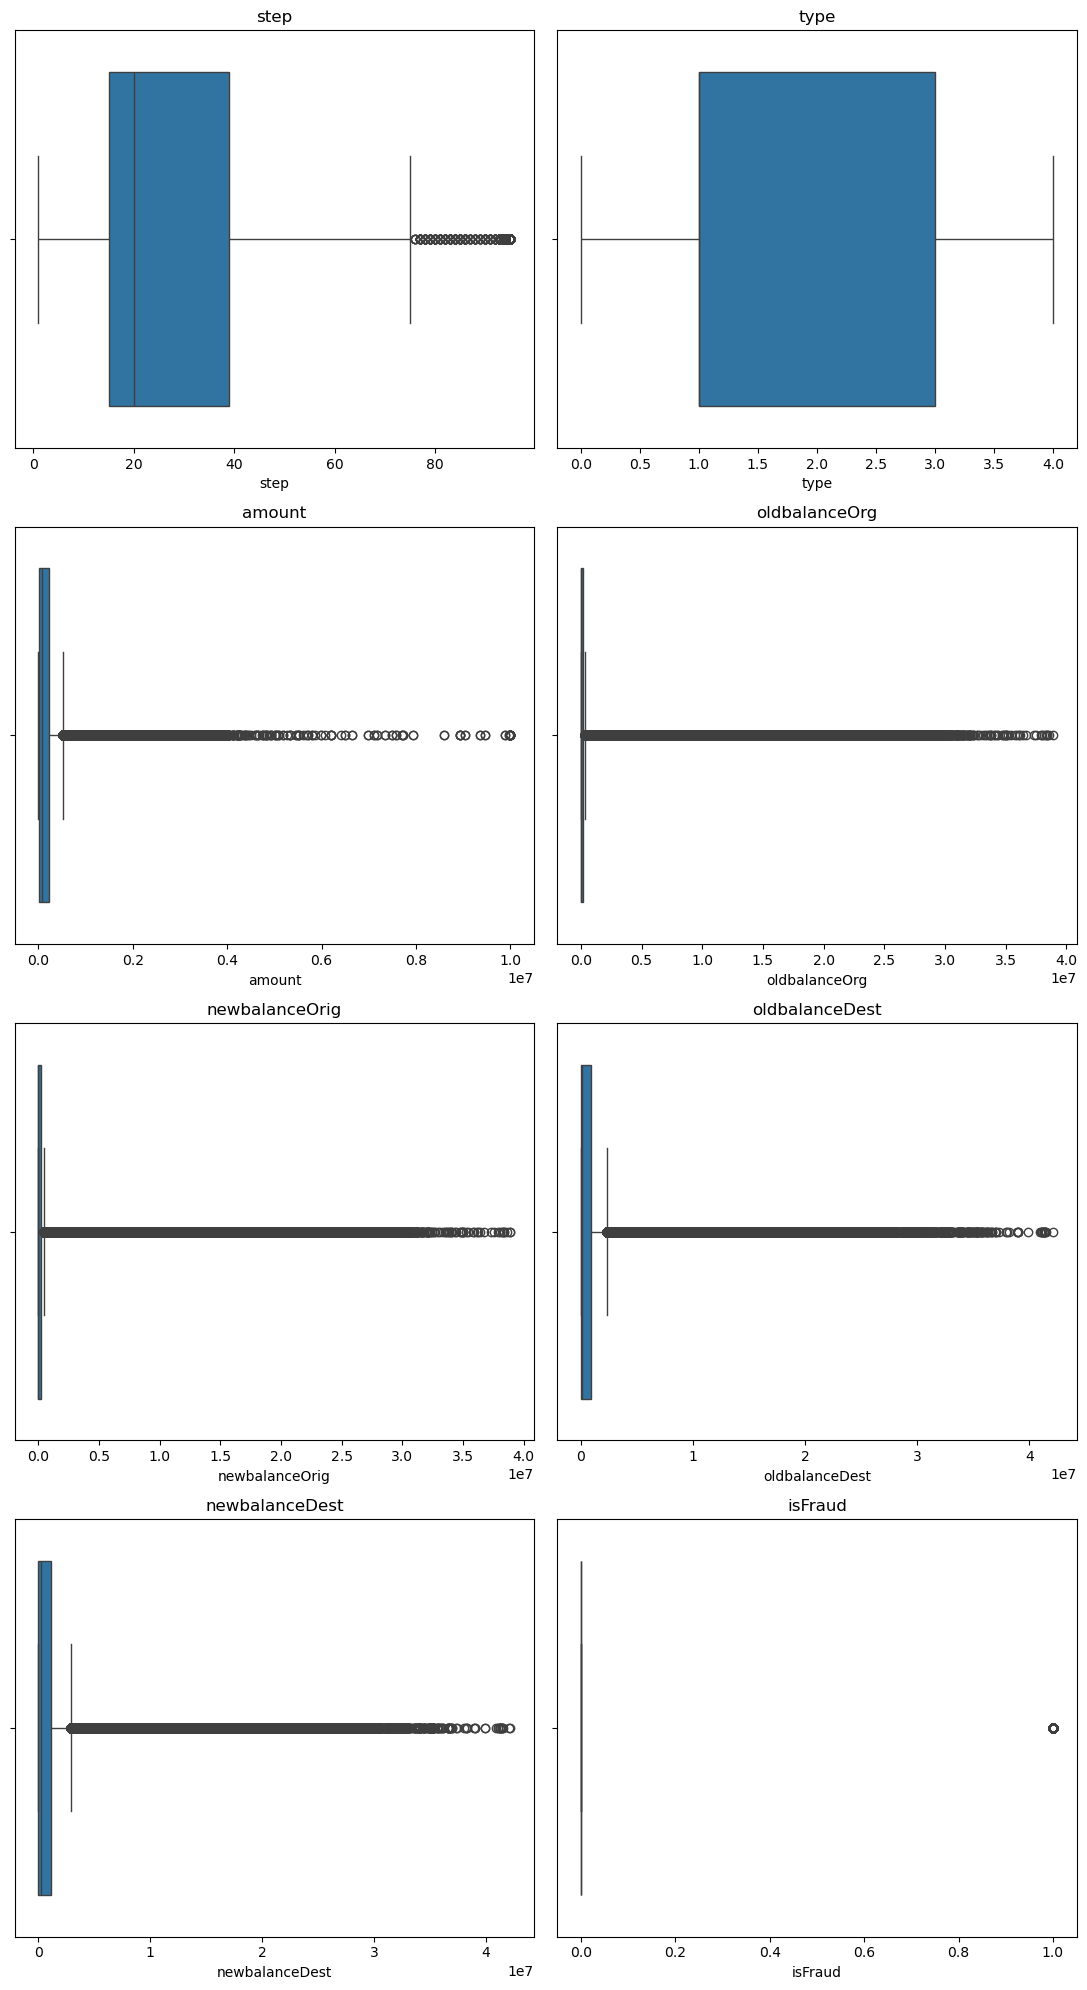

In [15]:
num_columns = df.shape[1]
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(11,num_rows * 5))
for i, column in enumerate(df.columns):
    plt.subplot(num_rows, 2, i + 1)
    sns.boxplot(x=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

# Handling Outliers

In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
print("Number of outliers:", outliers.sum())


Number of outliers: 332172


In [17]:
df_cleaned= df[~outliers]
print("Data shape after removing outliers:", df_cleaned.shape)

Data shape after removing outliers: (716403, 8)


In [18]:
df.describe(include='all')

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.713400e+00,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,1.345007e+00,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,0.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.000000e+00,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,1.000000e+00,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,3.000000e+00,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,4.000000e+00,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


# Data Visualization

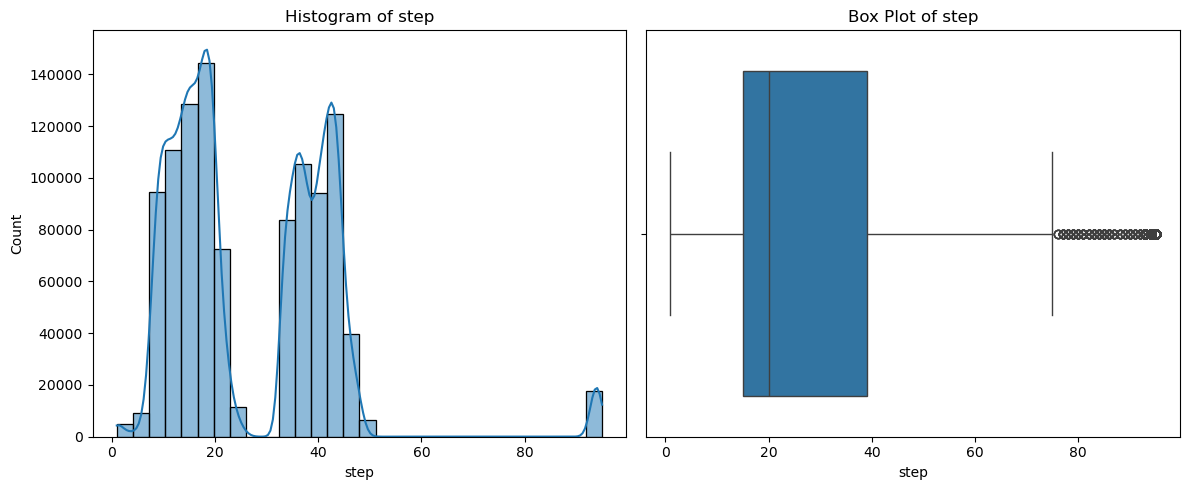

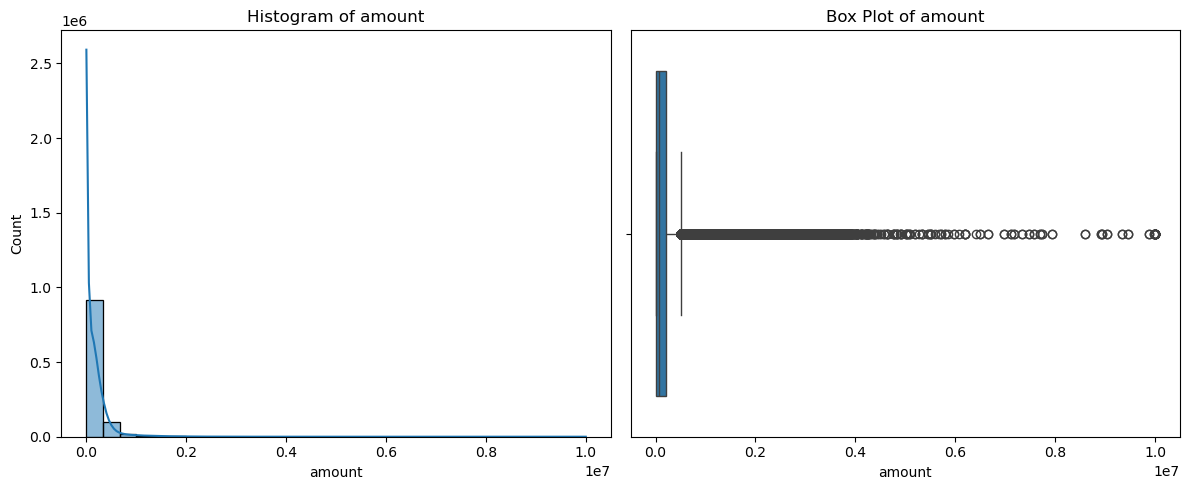

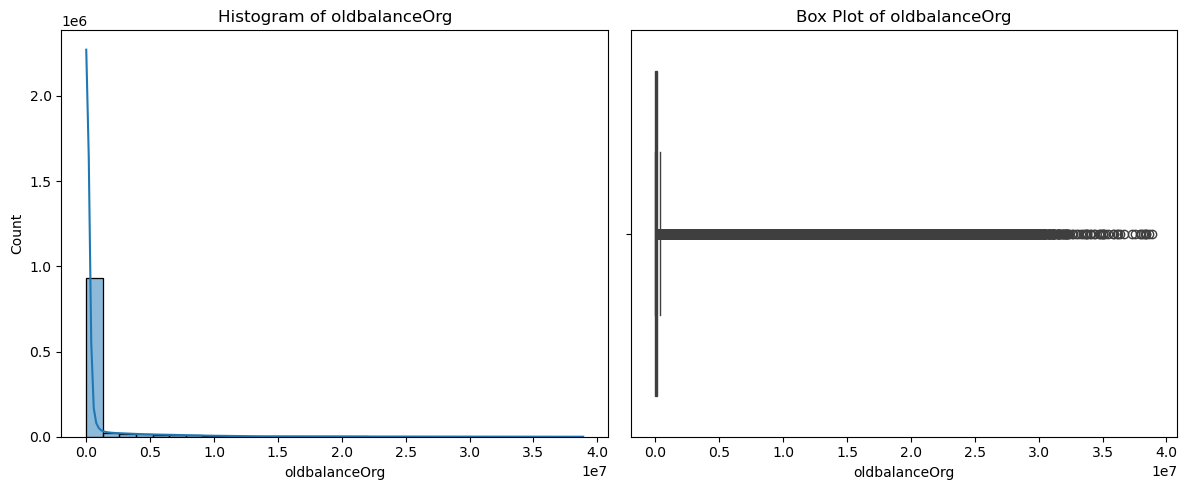

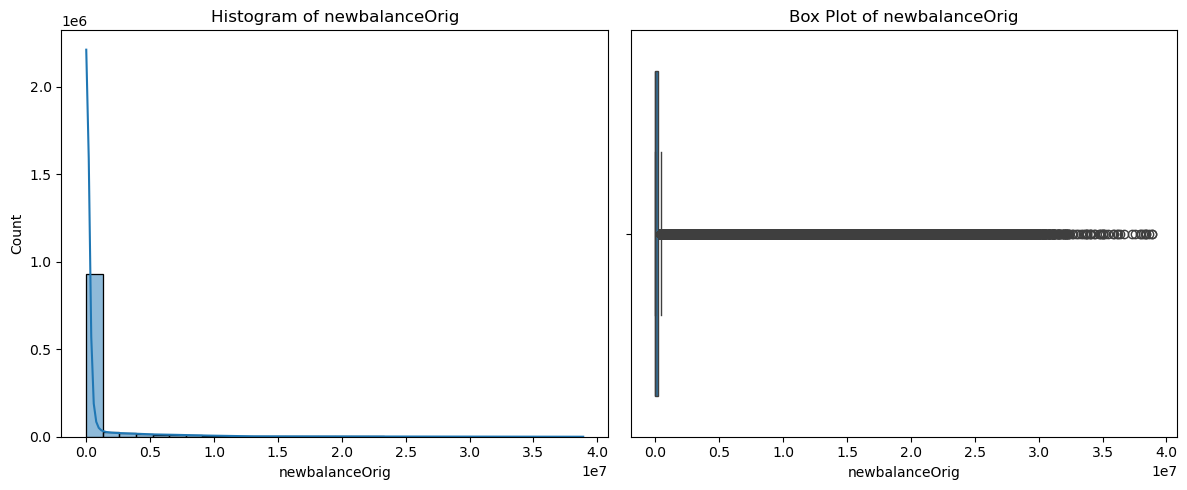

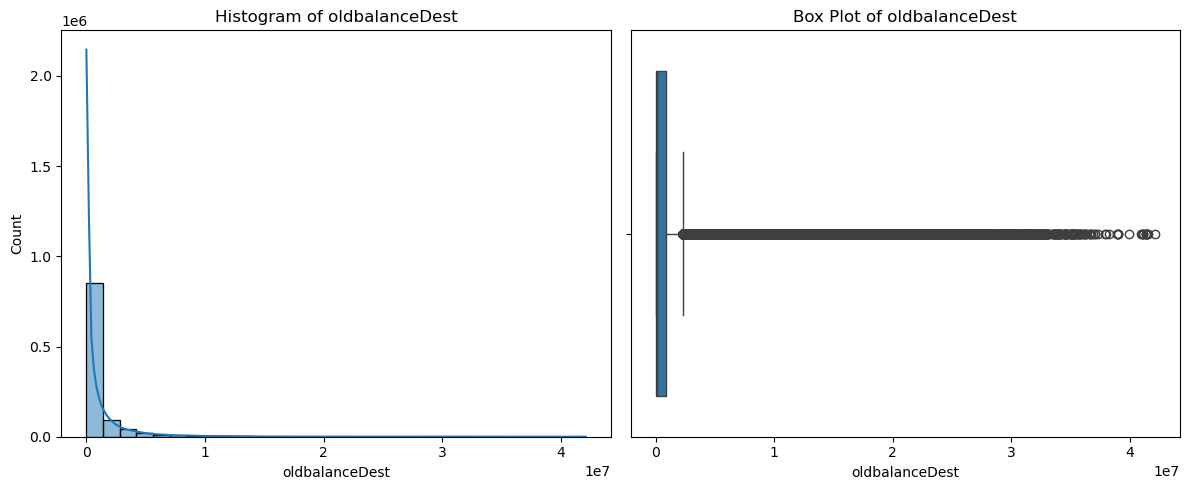

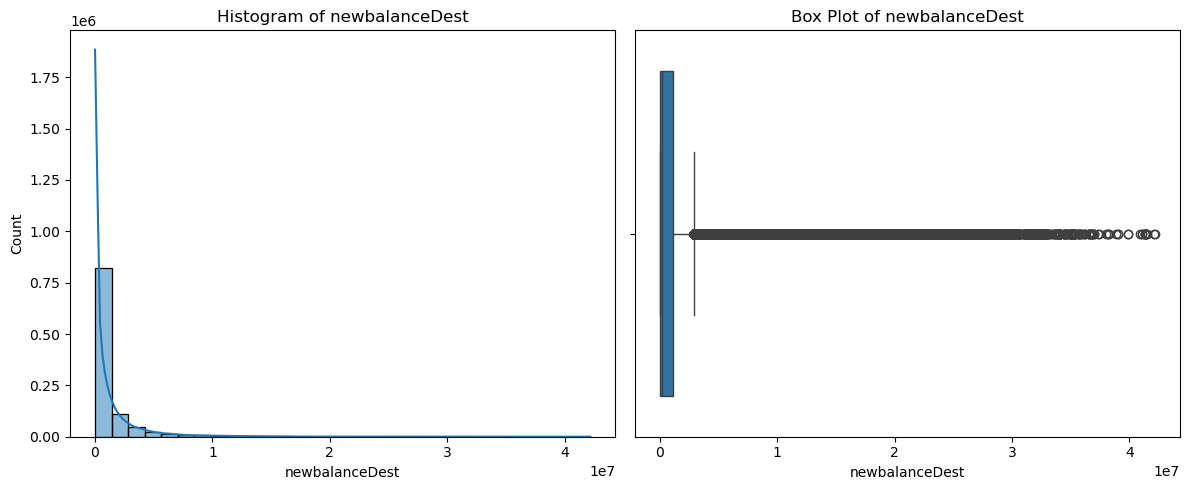

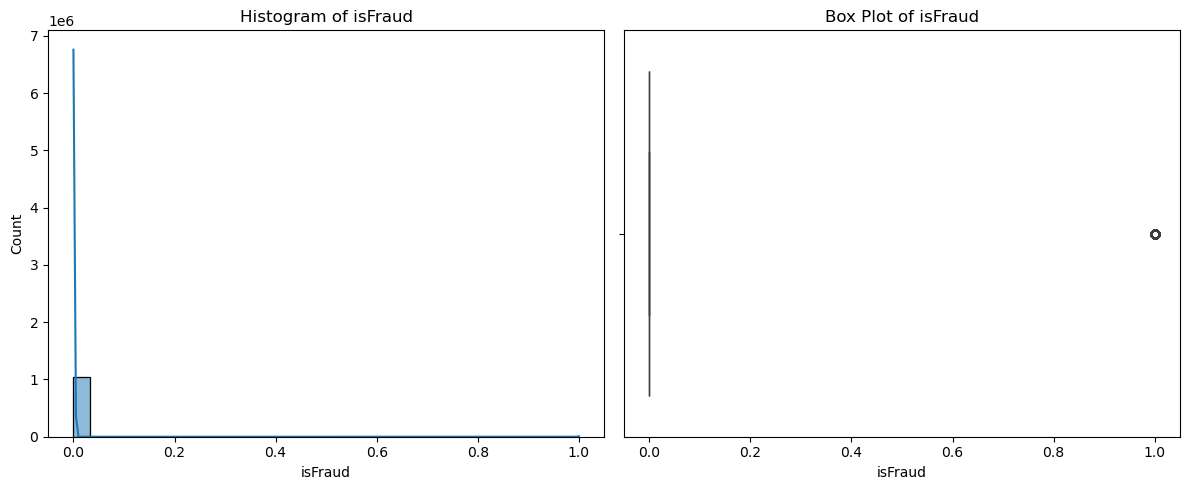

In [19]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_columns:
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')
    
    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    
    plt.tight_layout()
    plt.show()


In [20]:
df.shape

(1048575, 8)

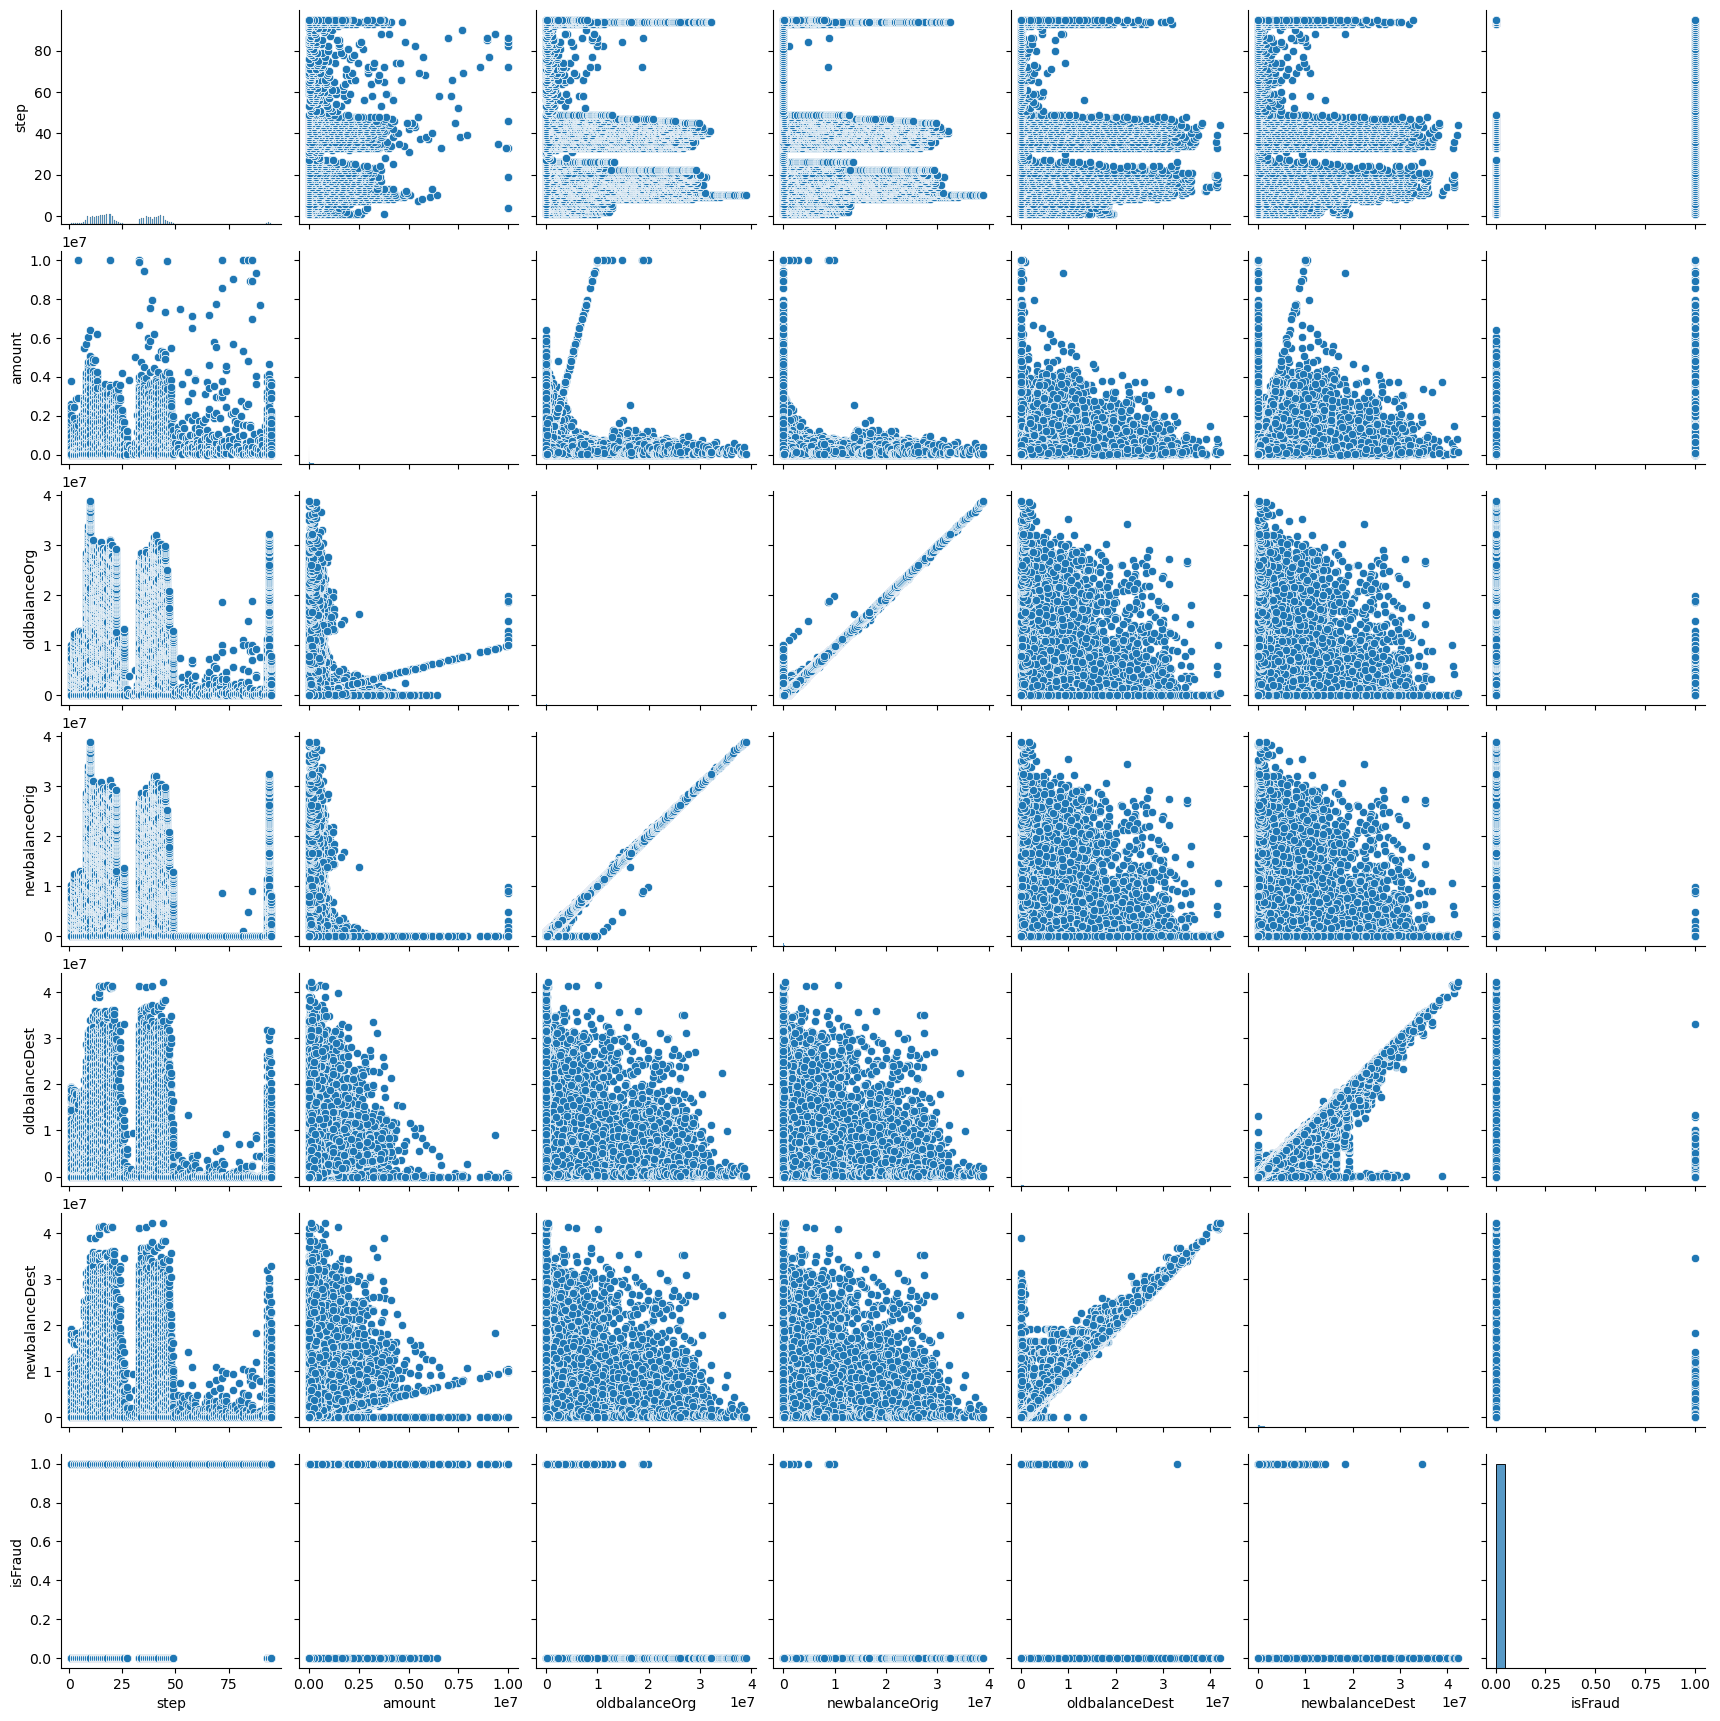

In [21]:
if len(numerical_columns) > 1:
    sns.pairplot(df[numerical_columns])
    plt.show()

# Heat Map

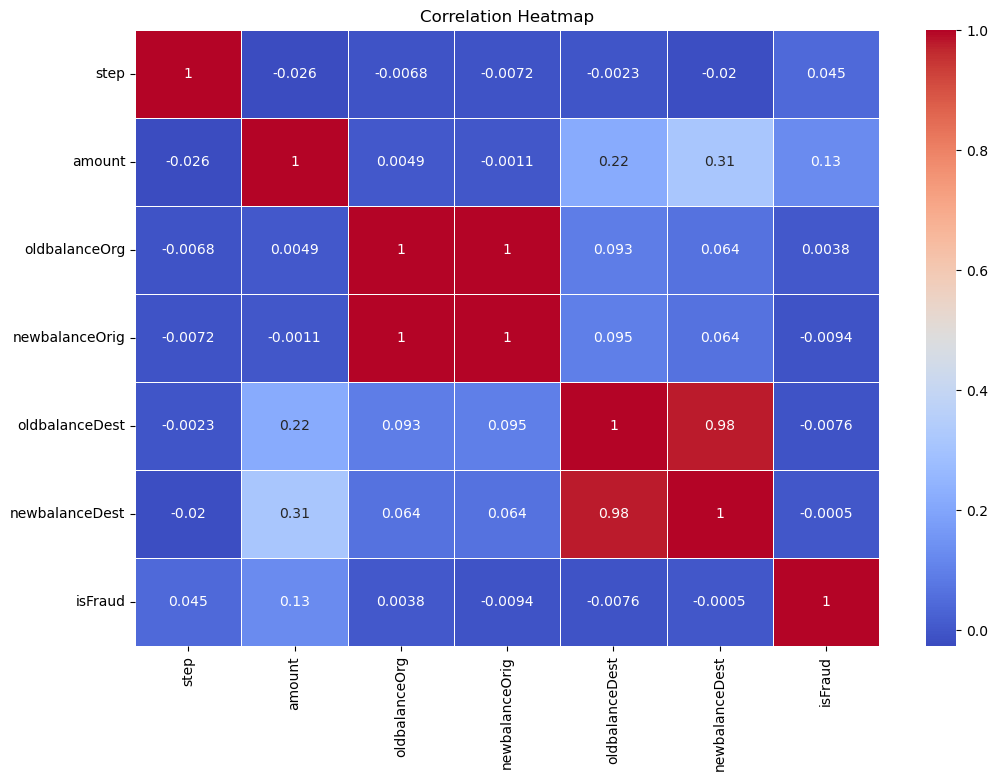

In [22]:
if len(numerical_columns) > 1:
    plt.figure(figsize=(12, 8))
    correlation_matrix = df[numerical_columns].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

# Splitting the data

In [23]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9839.64,170136.00,160296.36,0.00,0.00
1,1,3,1864.28,21249.00,19384.72,0.00,0.00
2,1,4,181.00,181.00,0.00,0.00,0.00
3,1,1,181.00,181.00,0.00,21182.00,0.00
4,1,3,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...,...
1048570,95,1,132557.35,479803.00,347245.65,484329.37,616886.72
1048571,95,3,9917.36,90545.00,80627.64,0.00,0.00
1048572,95,3,14140.05,20545.00,6404.95,0.00,0.00
1048573,95,3,10020.05,90605.00,80584.95,0.00,0.00


In [24]:
y

0          0
1          0
2          1
3          1
4          0
          ..
1048570    0
1048571    0
1048572    0
1048573    0
1048574    0
Name: isFraud, Length: 1048575, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(838860, 7)
(209715, 7)
(209715,)
(838860,)


# 1.Random Forest

In [27]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

y_test_predict1 = rfc.predict(X_test)
test_accuracy = accuracy_score(y_test,y_test_predict1)
test_accuracy

0.9997615811935245

In [28]:
y_train_predict1 = rfc.predict(X_train)
train_accuracy = accuracy_score(y_train,y_train_predict1)
train_accuracy

1.0

In [29]:
pd.crosstab(y_test,y_test_predict1)

col_0,0,1
isFraud,,
0,209490,4
1,46,175


In [30]:
print(classification_report(y_test,y_test_predict1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209494
           1       0.98      0.79      0.88       221

    accuracy                           1.00    209715
   macro avg       0.99      0.90      0.94    209715
weighted avg       1.00      1.00      1.00    209715



# 2.Decision Tree

In [31]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

y_test_predict2 = dtc.predict(X_test)
test_accuracy = accuracy_score(y_test,y_test_predict2)
test_accuracy

0.9995994564051213

In [32]:
y_train_predict2 = dtc.predict(X_train)
train_accuracy = accuracy_score(y_train,y_train_predict2)
train_accuracy

1.0

In [33]:
pd.crosstab(y_test,y_test_predict2)

col_0,0,1
isFraud,,
0,209447,47
1,37,184


In [34]:
print(classification_report(y_test,y_test_predict2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209494
           1       0.80      0.83      0.81       221

    accuracy                           1.00    209715
   macro avg       0.90      0.92      0.91    209715
weighted avg       1.00      1.00      1.00    209715



# 3.ExtraTrees Classifier

In [35]:
etc = ExtraTreesClassifier()
etc.fit(X_train,y_train)

y_test_predict3 = etc.predict(X_test)
test_accuracy = accuracy_score(y_test,y_test_predict3)
test_accuracy

0.999747276065136

In [36]:
y_train_predict3 = etc.predict(X_train)
train_accuracy = accuracy_score(y_train,y_train_predict3)
train_accuracy

1.0

In [37]:
pd.crosstab(y_test,y_test_predict3)

col_0,0,1
isFraud,,
0,209492,2
1,51,170


In [38]:
print(classification_report(y_test,y_test_predict3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209494
           1       0.99      0.77      0.87       221

    accuracy                           1.00    209715
   macro avg       0.99      0.88      0.93    209715
weighted avg       1.00      1.00      1.00    209715



# 4.SupportVectorMachine Classifier

In [39]:
svc = SVC()
svc.fit(X_train,y_train)

y_test_predict4 = svc.predict(X_test)
test_accuracy = accuracy_score(y_test,y_test_predict4)
test_accuracy

0.9991750709295949

In [40]:
y_train_predict4 = svc.predict(X_train)
train_accuracy = accuracy_score(y_train,y_train_predict4)
train_accuracy

0.9991178504160408

In [41]:
pd.crosstab(y_test,y_test_predict4)

col_0,0,1
isFraud,,
0,209493,1
1,172,49


In [42]:
print(classification_report(y_test,y_test_predict4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209494
           1       0.98      0.22      0.36       221

    accuracy                           1.00    209715
   macro avg       0.99      0.61      0.68    209715
weighted avg       1.00      1.00      1.00    209715



In [43]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [44]:
la = LabelEncoder()
y_train1 = la.fit_transform(y_train)
y_test1 = la.transform(y_test)
y_test1 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
y_train1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# 5.Xgboost Classifier

In [46]:
xgb1 = xgb.XGBClassifier()
xgb1.fit(X_train,y_train1)

y_test_predict5 = xgb1.predict(X_test)
test_accuracy = accuracy_score(y_test,y_test_predict5)
test_accuracy

0.9998235700832082

In [47]:
y_train_predict5 = xgb1.predict(X_train)
train_accuracy = accuracy_score(y_train1,y_train_predict5)
train_accuracy

0.9999356269222516

In [48]:
pd.crosstab(y_test,y_test_predict5)

col_0,0,1
isFraud,,
0,209492,2
1,35,186


In [49]:
print(classification_report(y_test,y_test_predict5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209494
           1       0.99      0.84      0.91       221

    accuracy                           1.00    209715
   macro avg       0.99      0.92      0.95    209715
weighted avg       1.00      1.00      1.00    209715



# Comparing the models

In [50]:
def compareModel():
    print("train accuracy for rfc",accuracy_score(y_train_predict1,y_train))
    print("test accuracy for rfc",accuracy_score(y_test_predict1,y_test))
    print("train accuracy for dtc",accuracy_score(y_train_predict2,y_train))
    print("test accuracy for dtc",accuracy_score(y_test_predict2,y_test))
    print("train accuracy for etc",accuracy_score(y_train_predict3,y_train))
    print("test accuracy for etc",accuracy_score(y_test_predict3,y_test))
    print("train accuracy for svc",accuracy_score(y_train_predict4,y_train))
    print("test accuracy for svc",accuracy_score(y_test_predict4,y_test))
    print("train accuracy for xgb1",accuracy_score(y_train_predict5,y_train1))
    print("test accuracy for xgb1",accuracy_score(y_test_predict5,y_test1))
compareModel()    

train accuracy for rfc 1.0
test accuracy for rfc 0.9997615811935245
train accuracy for dtc 1.0
test accuracy for dtc 0.9995994564051213
train accuracy for etc 1.0
test accuracy for etc 0.999747276065136
train accuracy for svc 0.9991178504160408
test accuracy for svc 0.9991750709295949
train accuracy for xgb1 0.9999356269222516
test accuracy for xgb1 0.9998235700832082


In [51]:
rfc.predict([['1','1','181.00','181.0','0.00','21182.0','0.0']])

C:\Users\krant\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [52]:
rfc.predict([['1','3','1864.28','21249.0','19384.72','0.0','0.0']])

C:\Users\krant\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [53]:
rfc.predict([['1','4','181.00','181.0','0.00','0.0','0.0']])

C:\Users\krant\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [54]:
dtc.predict([['1','3','1864.28','21249.0','19384.72','0.0','0.0']])

C:\Users\krant\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

# Evaluating the performance

In [55]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

y_test_predict1 = rfc.predict(X_test)
test_accuracy = accuracy_score(y_test,y_test_predict1)
test_accuracy

0.999747276065136

In [56]:
y_train_predict1 = rfc.predict(X_train)
train_accuracy = accuracy_score(y_train,y_train_predict1)
train_accuracy

0.9999988079059676

In [58]:
pickle.dump(rfc,open('randoms.pkl','wb'))